In [1]:
import os
import numpy as np
import scipy.io as sio
import mne

In [12]:
raw = mne.io.read_raw_edf('EDFs/DASS21-EDFs-Initial/DASS21-Ajinkya-07-Sep-18_20180907_011858_fil.edf', preload=True)

Extracting EDF parameters from /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/EDFs/DASS21-EDFs-Initial/DASS21-Ajinkya-07-Sep-18_20180907_011858_fil.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 57999  =      0.000 ...   231.996 secs...


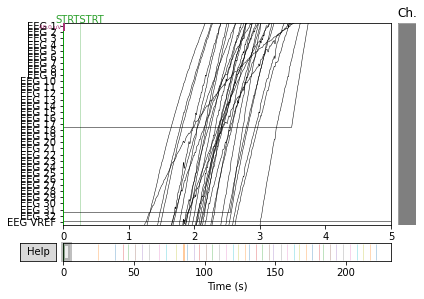

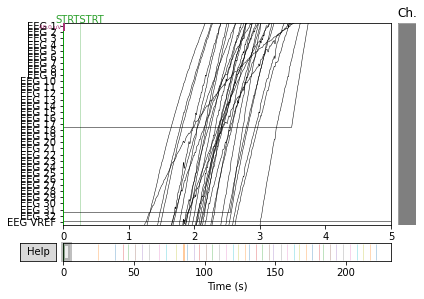

In [9]:
raw.plot(duration=5, n_channels=33)

Effective window size : 8.192 (s)


<ipython-input-10-a03f6251d98f>:1: UserWarning: Infinite value in PSD for channel EEG VREF.
These channels might be dead.
  fig = raw.plot_psd(fmax=60, average=True)


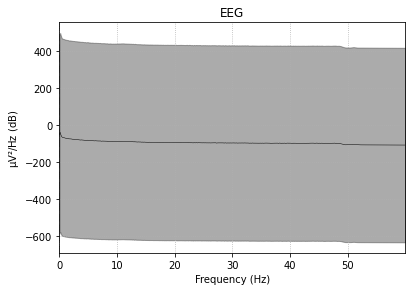

In [10]:
fig = raw.plot_psd(fmax=60, average=True)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)


<ipython-input-5-16ed072602ad>:3: UserWarning: Infinite value in PSD for channel EEG VREF.
These channels might be dead.
  fig  = raw_notch.plot_psd(fmax=60, average=True)


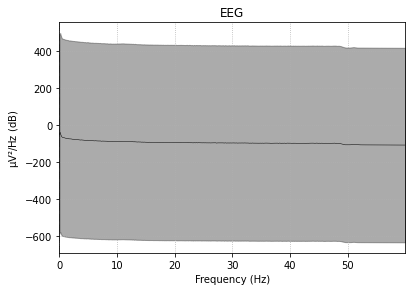

In [5]:
freqs = (50, 100)
raw_notch = raw.copy().notch_filter(freqs=freqs)
fig  = raw_notch.plot_psd(fmax=60, average=True)

In [6]:
anns = raw.annotations

In [7]:
for ann in anns:
    print(ann)

OrderedDict([('onset', 0.25), ('duration', 0.001), ('description', 'STRTSTRT'), ('orig_time', datetime.datetime(2018, 9, 7, 13, 25, 59, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 24.322), ('duration', 0.001), ('description', 'Q01B'), ('orig_time', datetime.datetime(2018, 9, 7, 13, 25, 59, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 36.939), ('duration', 0.001), ('description', 'Q011'), ('orig_time', datetime.datetime(2018, 9, 7, 13, 25, 59, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 41.938), ('duration', 0.001), ('description', 'Q02B'), ('orig_time', datetime.datetime(2018, 9, 7, 13, 25, 59, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 45.972), ('duration', 0.001), ('description', 'Q022'), ('orig_time', datetime.datetime(2018, 9, 7, 13, 25, 59, tzinfo=datetime.timezone.utc))])
OrderedDict([('onset', 50.972), ('duration', 0.001), ('description', 'Q03B'), ('orig_time', datetime.datetime(2018, 9, 7, 13, 25, 59, tzinfo=datetime.timezone.utc)

In [13]:
raw_test = mne.io.read_raw_edf('EDFs/DASS21-EDFs-Initial/DASS21-Ajinkya-07-Sep-18_20180907_011858_fil.edf', preload=True)
annot_test = raw.annotations

Extracting EDF parameters from /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/EDFs/DASS21-EDFs-Initial/DASS21-Ajinkya-07-Sep-18_20180907_011858_fil.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 57999  =      0.000 ...   231.996 secs...


In [18]:
annot_test.onset, annot_test.description

(array([  0.25 ,  24.322,  36.939,  41.938,  45.972,  50.972,  55.522,
         60.522,  67.506,  72.505,  80.106,  85.105,  87.439,  92.439,
         96.056, 101.055, 105.206, 110.205, 114.956, 119.955, 123.689,
        128.689, 131.756, 136.756, 140.872, 145.872, 148.823, 153.822,
        158.239, 163.239, 166.823, 171.822, 175.94 , 180.939, 184.089,
        189.089, 192.756, 197.756, 203.273, 208.273, 212.223, 217.223,
        221.273]),
 array(['STRTSTRT', 'Q01B', 'Q011', 'Q02B', 'Q022', 'Q03B', 'Q030', 'Q04B',
        'Q040', 'Q05B', 'Q051', 'Q06B', 'Q062', 'Q07B', 'Q072', 'Q08B',
        'Q070', 'Q09B', 'Q091', 'Q10B', 'Q100', 'Q11B', 'Q110', 'Q12B',
        'Q121', 'Q13B', 'Q130', 'Q14B', 'Q142', 'Q15B', 'Q151', 'Q16B',
        'Q161', 'Q17B', 'Q170', 'Q18B', 'Q181', 'Q19B', 'Q193', 'Q20B',
        'Q200', 'Q21B', 'Q210'], dtype='<U8'))

In [19]:
Q01B_Q011_raw_test = raw_test.crop(24.322, 36.939)

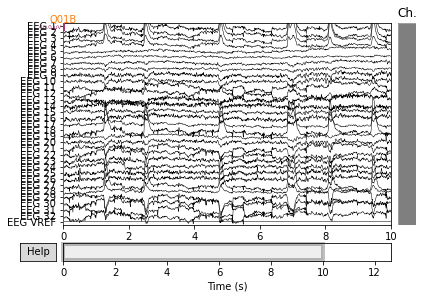

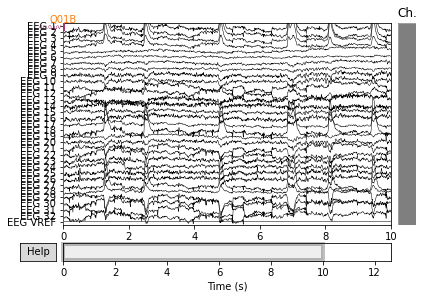

In [21]:
Q01B_Q011_raw_test.plot(n_channels = 33)

In [38]:
annot_test.__len__()

43

# final code

In [47]:
import os
import numpy as np
import scipy.io as sio
import mne

directory = r'EDFs/DASS21-EDFs-Initial'
target_dir = r'segmented_DASS21_edfs'

for entry in os.scandir(directory):
    if (entry.path.endswith(".edf") and entry.is_file()):
        filepath = entry.path
        filename = entry.name
        filename = filename[:-4]
        print(filename)
        raw = mne.io.read_raw_edf(filepath, preload=True)
        raw_highpass = raw.filter(l_freq=0.1, h_freq=None)
        freqs = (50, 100)
        raw_notch = raw_highpass.copy().notch_filter(freqs=freqs)
        
        annot = raw_notch.annotations
        target_subject = os.path.join(target_dir, filename)
        if not os.path.exists(target_subject):
            os.mkdir(target_subject)
        for i in range(annot.__len__() - 1):
            raw_copy = raw_notch.copy()
            raw_i = raw_copy.crop(annot.onset[i], annot.onset[i+1])
            target_filename = annot.description[i] + '_' + annot.description[i+1] + '_raw.fif' 
            target_path = os.path.join(target_subject, target_filename)
            raw_i.save(target_path, overwrite=True)

DASS21-Leah-10-01-2018_20180110_032644_fil
Extracting EDF parameters from /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/EDFs/DASS21-EDFs-Initial/DASS21-Leah-10-01-2018_20180110_032644_fil.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 166499  =      0.000 ...   166.499 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) m

Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS21-Leah-10-01-2018_20180110_032644_fil/Q101_Q11B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS21-Leah-10-01-2018_20180110_032644_fil/Q101_Q11B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS21-Leah-10-01-2018_20180110_032644_fil/Q11B_Q110_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS21-Leah-10-01-2018_20180110_032644_fil/Q11B_Q110_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS21-Leah-10-01-2018_20180110_032644_fil/Q110_Q12B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS21-Leah-10-

---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8251 samples (33.004 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS 21-Hrishikesh-11Nov_20161111_034749_fil/STRTSTRT_Q01B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segment

Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS 21-Hrishikesh-11Nov_20161111_034749_fil/Q11B_Q111_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS 21-Hrishikesh-11Nov_20161111_034749_fil/Q111_Q12B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS 21-Hrishikesh-11Nov_20161111_034749_fil/Q111_Q12B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS 21-Hrishikesh-11Nov_20161111_034749_fil/Q12B_Q121_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS 21-Hrishikesh-11Nov_20161111_034749_fil/Q12B_Q121_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edf

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/STRTSTRT_Q01B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/STRTSTRT_Q01B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/Q01B_Q011_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/Q01B_Q011_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-A

Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/Q12B_Q121_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/Q12B_Q121_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/Q121_Q13B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/Q121_Q13B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_20180911_011306_fil/Q13B_Q130_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Akshat-11-09-18_2018

Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q01B_Q011_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q011_Q02B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q011_Q02B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q02B_Q021_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q02B_Q021_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-0

Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q13B_Q132_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q13B_Q132_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q132_Q14B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q132_Q14B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-2018_20180905_121644_fil/Q14B_Q142_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Nikhil-05-9-201

Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q02B_Q021_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q02B_Q021_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q021_Q03B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q021_Q03B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q03B_Q030_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajw

Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q130_Q14B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q14B_Q141_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q14B_Q141_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q141_Q15B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Dass-Prajwal-14-09-2018_20180914_120932_fil/Q141_Q15B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/Das

Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Shivam-14-09-18_20180914_040813_fil/Q022_Q03B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Shivam-14-09-18_20180914_040813_fil/Q03B_Q033_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Shivam-14-09-18_20180914_040813_fil/Q03B_Q033_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Shivam-14-09-18_20180914_040813_fil/Q033_Q04B_raw.fif
Closing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Shivam-14-09-18_20180914_040813_fil/Q033_Q04B_raw.fif [done]
Writing /media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/segmented_DASS21_edfs/DASS-Shivam-14-09-

OSError: [Errno 28] No space left on device

Opening raw data file segmented_DASS21_edfs/DASS21-Leah-10-01-2018_20180110_032644_fil/Q011_Q02B_raw.fif...
Isotrak not found
    Range : 25514 ... 30514 =     25.514 ...    30.514 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...


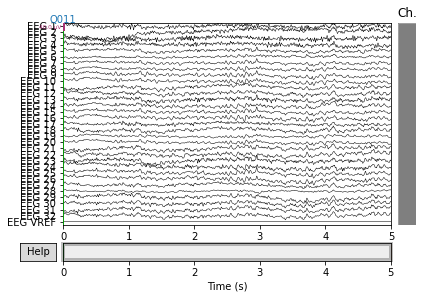

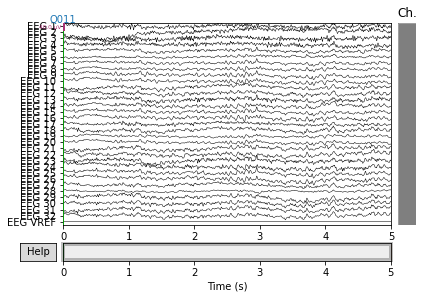

In [50]:
raw = mne.io.read_raw_fif('segmented_DASS21_edfs/DASS21-Leah-10-01-2018_20180110_032644_fil/Q011_Q02B_raw.fif', preload=True)
raw.plot(n_channels=33)

Opening raw data file segmented_DASS21_edfs/SA-Kapil-11Sep_20160911_042210_fil/Q14En_Q15Bn_raw.fif...
Isotrak not found
    Range : 219843 ... 224842 =    219.843 ...   224.842 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


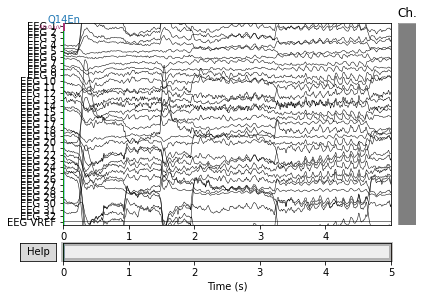

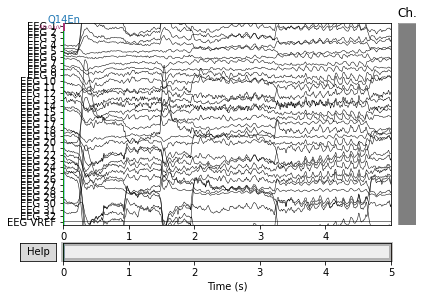

In [51]:
raw = mne.io.read_raw_fif('segmented_DASS21_edfs/SA-Kapil-11Sep_20160911_042210_fil/Q14En_Q15Bn_raw.fif', preload=True)
raw.plot(n_channels=33)